<a href="https://colab.research.google.com/github/yantiputri/SEMESTER-3/blob/main/tugas13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
kaggle = '/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.17GB/s]


In [ ]:
from zipfile import ZipFile
import os

file_name = 'handwritten-digits-0-9.zip'
extract_folder = 'datasets'

os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
    zip.extractall(extract_folder)

print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/datasets/0')
data_1 = os.listdir('/content/datasets/1')
data_2 = os.listdir('/content/datasets/2')
data_3 = os.listdir('/content/datasets/3')
data_4 = os.listdir('/content/datasets/4')
data_5 = os.listdir('/content/datasets/5')
data_6 = os.listdir('/content/datasets/6')
data_7 = os.listdir('/content/datasets/7')
data_8 = os.listdir('/content/datasets/8')
data_9 = os.listdir('/content/datasets/9')

In [ ]:
len(data_0)

2236

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Load Dataset MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape X_train: (60000, 28, 28)
Shape X_test: (10000, 28, 28)


Preprocessing Data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Normalisasi pixel (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Pembuatan Model Multi-Layer Perceptron (MLP)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Kompilasi Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8190 - loss: 0.6379 - val_accuracy: 0.9597 - val_loss: 0.1402
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9529 - loss: 0.1571 - val_accuracy: 0.9652 - val_loss: 0.1196
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9688 - loss: 0.1068 - val_accuracy: 0.9745 - val_loss: 0.0881
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9775 - loss: 0.0753 - val_accuracy: 0.9752 - val_loss: 0.0815
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9832 - loss: 0.0590 - val_accuracy: 0.9772 - val_loss: 0.0763
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0482 - val_accuracy: 0.9765 - val_loss: 0.0772
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9897 - loss: 0.0359 - val_accuracy: 0.9765 - val_loss: 0.0821
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.

Evaluasi Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0841
Test Accuracy: 0.9789000153541565
Test Loss: 0.07308463007211685


Visualisasi Hasil Training

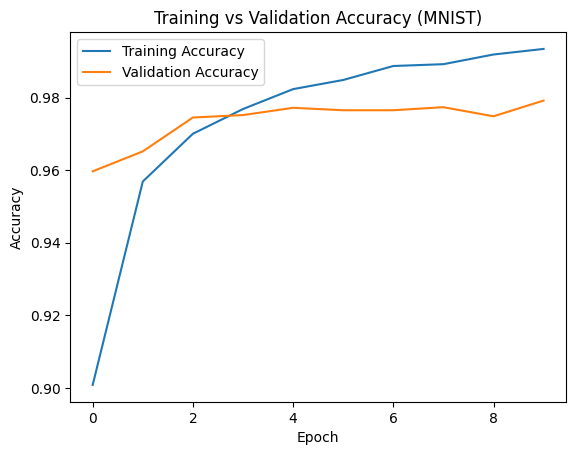

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (MNIST)')
plt.show()